In [141]:
import torch
import torch.optim as optim
from torch import nn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from os import listdir

In [142]:
X_0 = torch.load('../tensors/00/0/X.pt')
y_0 = torch.load('../tensors/00/0/y.pt')

X_1 = torch.load('../tensors/00/6/X.pt')
y_1 = torch.load('../tensors/00/6/y.pt')


print(f' y0: {y_0.shape}   y1: {y_1.shape}')

X = torch.vstack((X_0, X_1))
y = torch.concat((y_0, y_1), dim=0)
y.shape

 y0: torch.Size([4473])   y1: torch.Size([3090])


torch.Size([7563])

In [143]:
X = X.float()
y = y.long()

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=43)

In [145]:
X_train.shape

torch.Size([6050, 900])

**Here we def the archatecture for simple MLP**

In [146]:
class NN(nn.Module):
    def __init__(self) -> None:
        super(NN, self).__init__()
        self.model00 = nn.Sequential(
            nn.Linear(900,128),
            nn.ReLU(),
            nn.Linear(128,2)
        )
    
    def forward(self, X):
        logits = self.model00(X)
        return logits


**Now lets make the optimizer and criterion**

In [147]:
model00 = NN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model00.parameters())
epochs = range(10)

**Now lets make simple trainitng loop**

In [148]:
loss_list = []

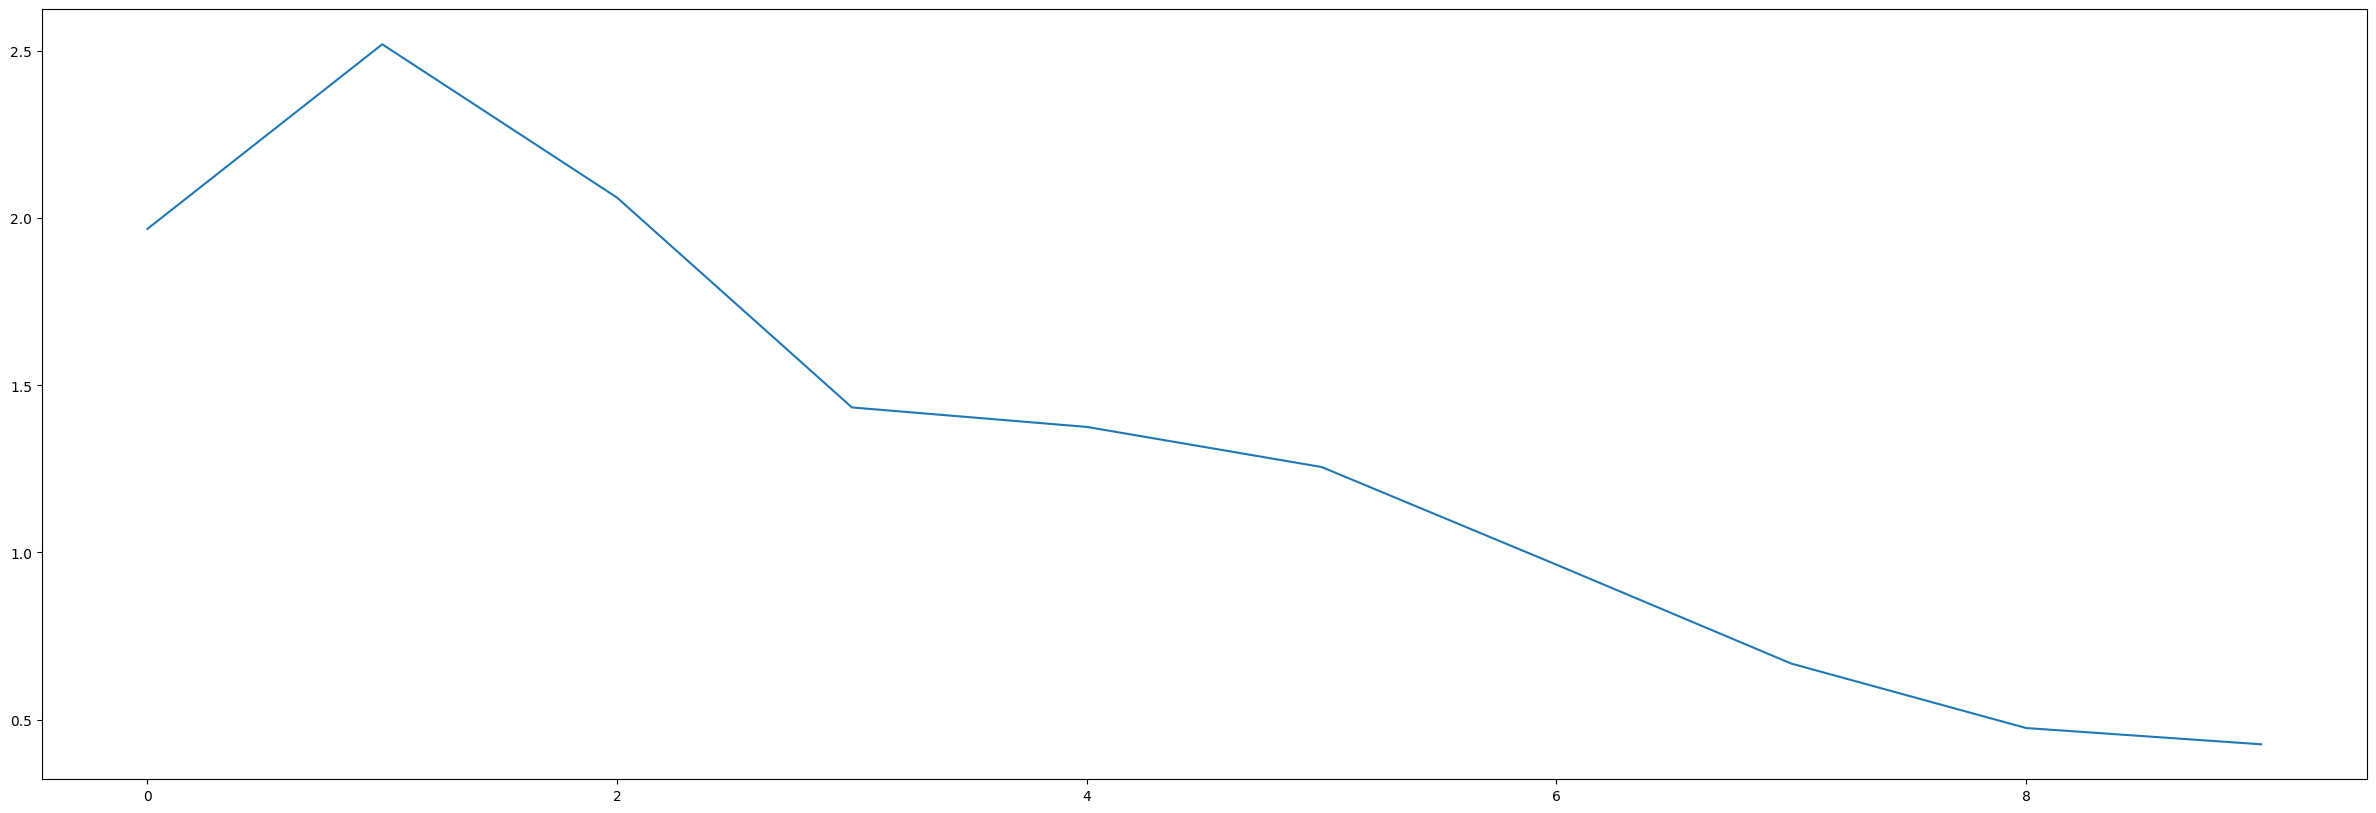

0.42622414231300354


In [149]:
for epoch in epochs:
    optimizer.zero_grad()
    logits = model00(X_train)

    loss = criterion(logits, y_train)
    loss.backward()

    loss_list.append(loss.item())

    optimizer.step()

plt.plot(loss_list)
plt.show()

print(loss_list[-1])

In [150]:
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = y_pred.argmax(dim=1)

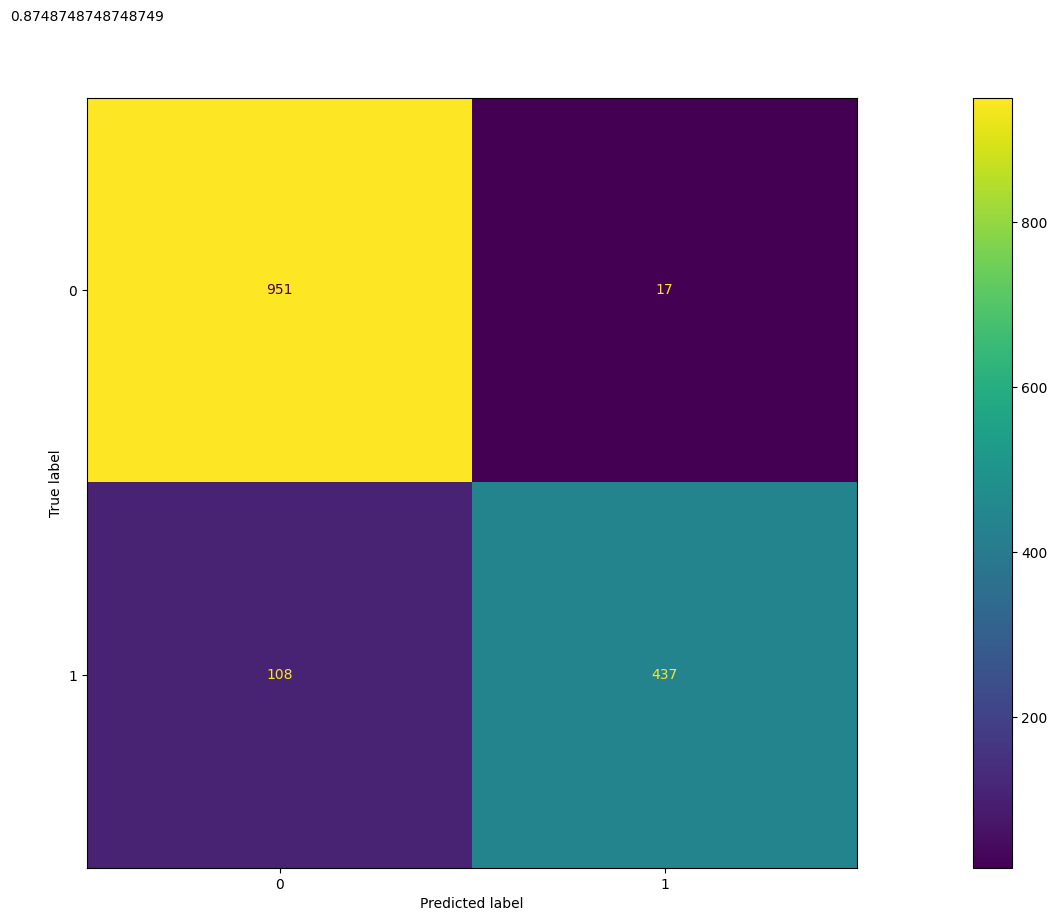

In [151]:
from sklearn.metrics import ConfusionMatrixDisplay, f1_score

fig = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.text(-.7,-.7,f1_score(y_test,y_pred=y_pred))
plt.show()

In [152]:
f1_total = 0
total = 0
for rec in sorted(listdir('../tensors/00/')):
    X_ = torch.load('../tensors/00/'+rec+'/X.pt').float()
    y_ = torch.load('../tensors/00/'+rec+'/y.pt').long()

    out = model00.forward(X_)
    with torch.no_grad():
        out_argmax = out.argmax(dim=1)

    f1_total += f1_score(y_, out_argmax)
    total += 1

    # fig = ConfusionMatrixDisplay.from_predictions(y_true = y_, y_pred = out_argmax, display_labels=['water','listerine'])
    # plt.title(rec)
    # plt.text(-.8,-.8,f1_score(y_, out_argmax))
    # plt.show()

<style>
hr {
  border: none;
  border-top: 10px solid pink;
}
</style>

---

In [153]:
f1_total / total

0.6785711392503807

**good start so we learn that as we tain more and more on recoding 0. we overfit on it the the f1 goes down for the rest**

## lets make a nn that has more depth and see if that will help generalize better even if we jsut train on one example

In [154]:
class NN01(nn.Module):
    def __init__(self) -> None:
        super(NN01, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(900, 128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,16),
            nn.ReLU(),
            nn.Linear(16,2)
        )

    def forward(self, X):
        return self.model(X)

In [155]:
# epochs = range(100)

model = NN01()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

**training loop**

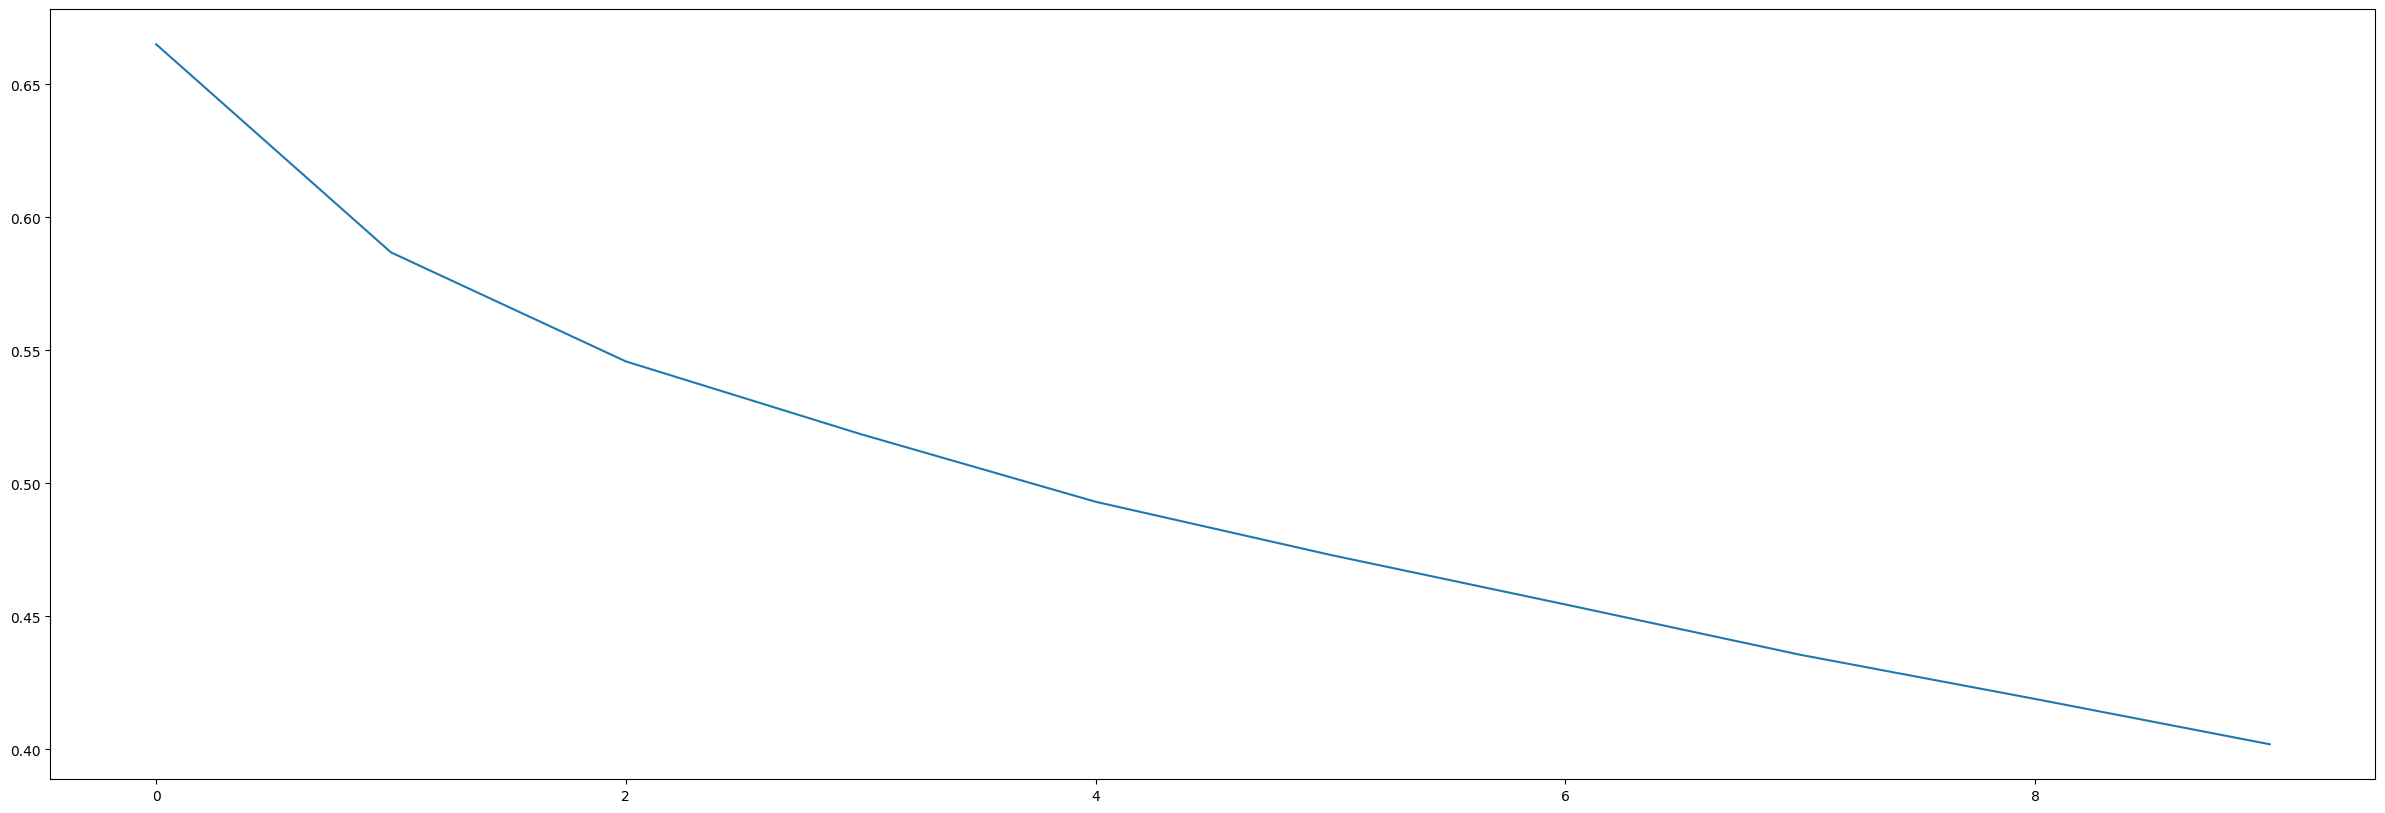

0.4019189774990082


In [156]:
loss_list = []
for epoch in epochs:

    optimizer.zero_grad()
    logits = model.forward(X_train)

    loss = criterion(logits, y_train)
    loss.backward()
    loss_list.append(loss.item())

    optimizer.step()
    
plt.plot(loss_list)
plt.show()

print(loss_list[-1])

**time to eval**

In [157]:
f1_total = 0
total = 0
for rec in sorted(listdir('../tensors/00/')):
    X_ = torch.load('../tensors/00/'+rec+'/X.pt').float()
    y_ = torch.load('../tensors/00/'+rec+'/y.pt').long()

    out = model.forward(X_)
    with torch.no_grad():
        out_argmax = out.argmax(dim=1)

    f1_total += f1_score(y_, out_argmax)
    total += 1

    # fig = ConfusionMatrixDisplay.from_predictions(y_true = y_, y_pred = out_argmax, display_labels=['water','listerine'])
    # plt.title(rec)
    # plt.text(-.8,-.8,f1_score(y_, out_argmax))
    # plt.show()

In [158]:
f1_total / total   

0.6371506051095659

<style>
hr {
  border: none;
  border-top: 10px solid pink;
}
</style>

---

### now lets look as the number of epcs we trained on ``` [1,5,10,15,20,40,100,200,500,1000] ``` for both models and compare

In [159]:
# epochs = range(100)

model00 = NN()

criterion00 = nn.CrossEntropyLoss()
optimizer00 = torch.optim.Adam(model00.parameters())

model01 = NN01()

criterion01 = nn.CrossEntropyLoss()
optimizer01 = torch.optim.Adam(model01.parameters())

In [166]:
f1_00 = []
f1_01 = []

for epochs_val in [1,5,10,15,20,40,100,200,500]:

    model00 = NN()
    criterion00 = nn.CrossEntropyLoss()
    optimizer00 = torch.optim.Adam(model00.parameters())

    model01 = NN01()
    criterion01 = nn.CrossEntropyLoss()
    optimizer01 = torch.optim.Adam(model01.parameters())

    for epoch in range(epochs_val):

        optimizer00.zero_grad()
        logits00 = model00.forward(X_train)
        loss00 = criterion00(logits00, y_train)
        loss00.backward()
        optimizer00.step()

        optimizer01.zero_grad()
        logits01 = model01.forward(X_train)
        loss01 = criterion00(logits01, y_train)
        loss01.backward()
        optimizer01.step()
        
    #eval each one
    f1_00_total = 0
    f1_01_total = 0
    total = 0
    for rec in sorted(listdir('../tensors/00/')):
        X_ = torch.load('../tensors/00/'+rec+'/X.pt').float()
        y_ = torch.load('../tensors/00/'+rec+'/y.pt').long()

        out_00 = model00.forward(X_)
        out_01 = model01.forward(X_)

        with torch.no_grad():
            pred_00 = out_00.argmax(dim=1)
            pred_01 = out_01.argmax(dim=1)

        f1_00_total += f1_score(y_, pred_00)
        f1_01_total += f1_score(y_, pred_01)
        total += 1

    f1_00.append(f1_00_total / total)
    f1_01.append(f1_01_total / total)




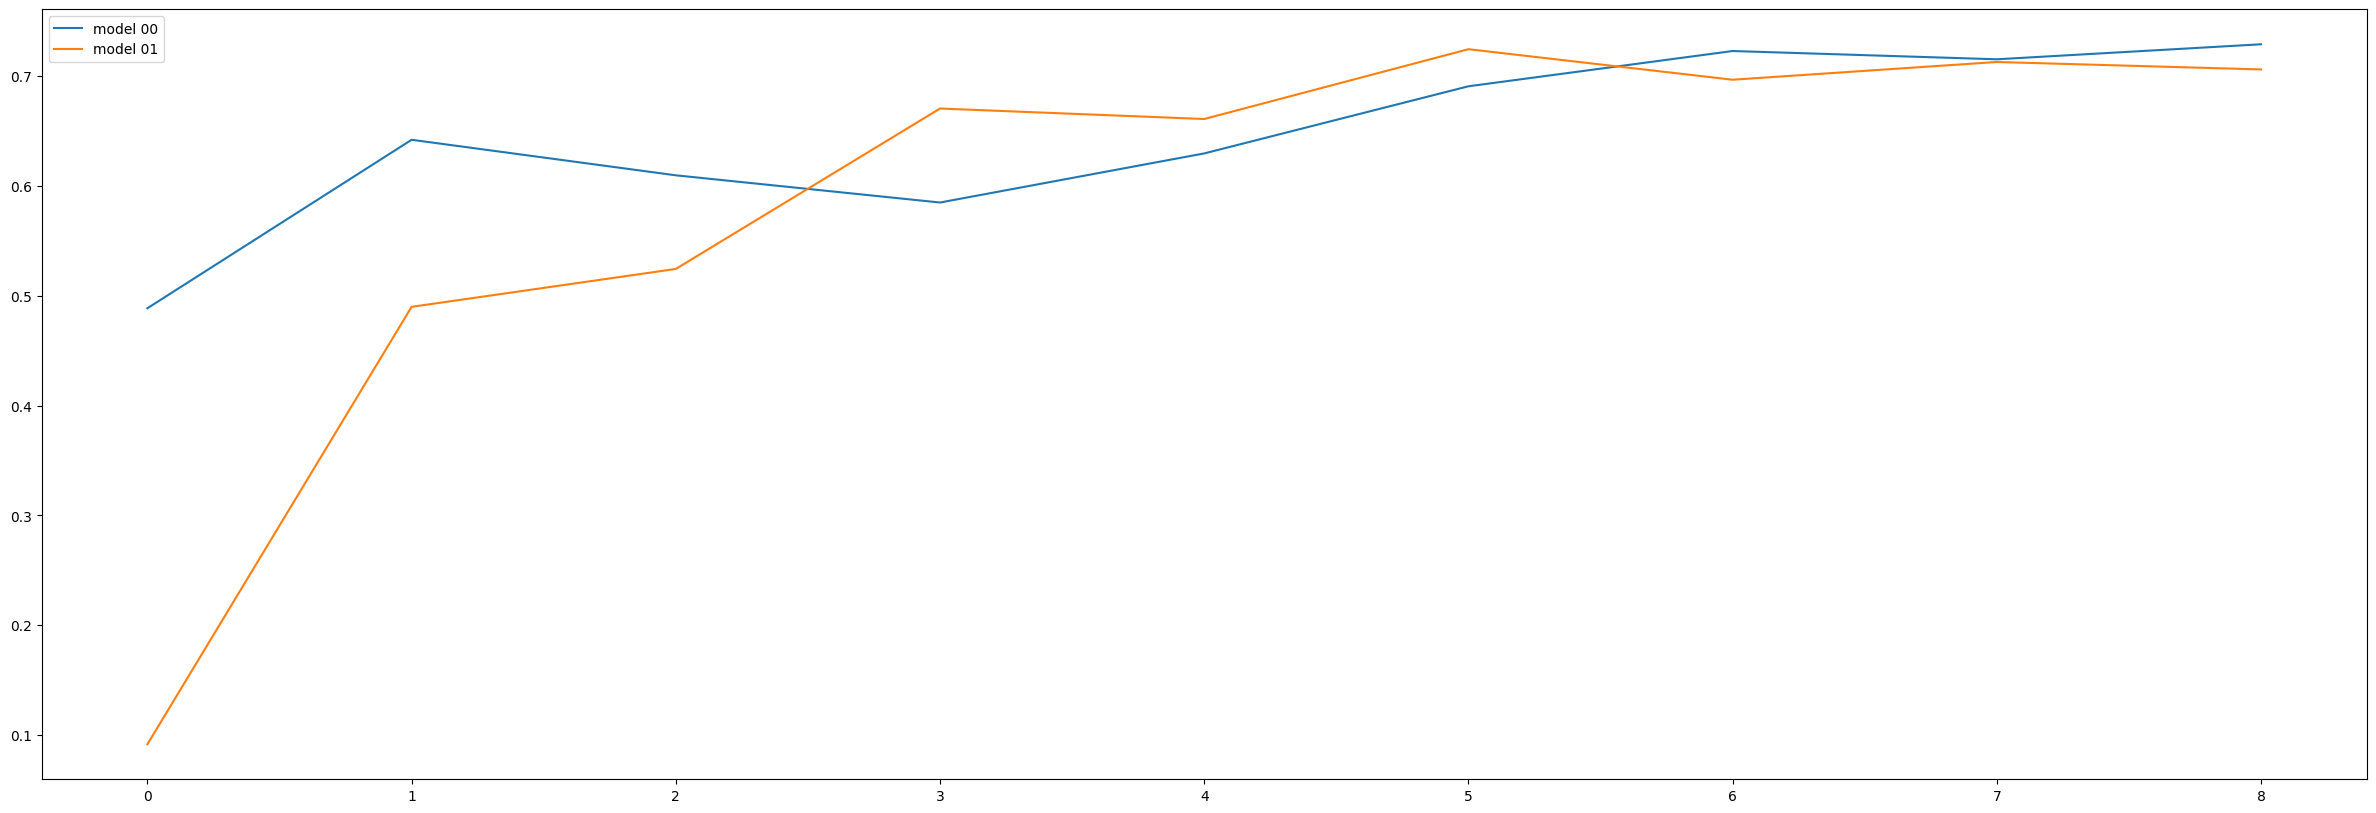

In [161]:
plt.plot(f1_00, label='model 00')
plt.plot(f1_01, label='model 01')
plt.legend()
plt.show()

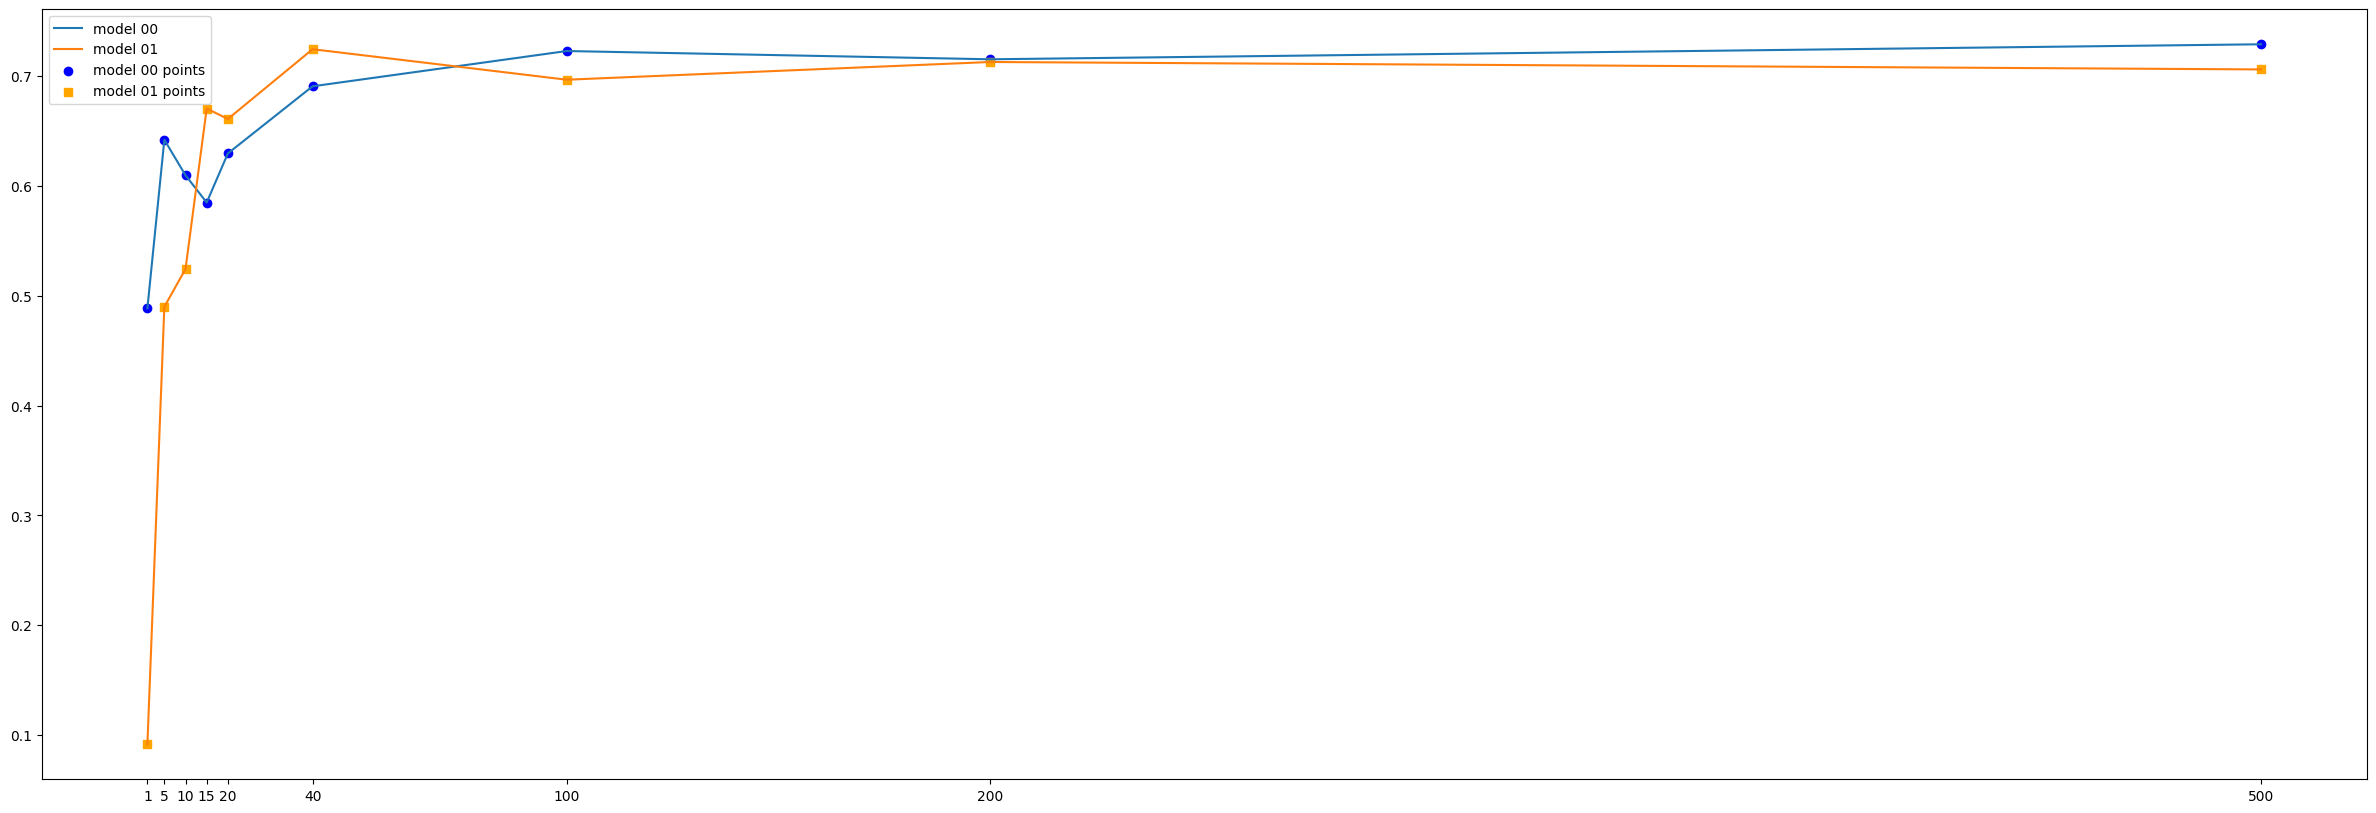

In [162]:
x_values = [1, 5, 10, 15, 20, 40, 100, 200, 500]
# Plot the lines
plt.plot(x_values, f1_00, label='model 00')
plt.plot(x_values, f1_01, label='model 01')

# Plot the points for model 00
plt.scatter(x_values, f1_00, marker='o', color='b', label='model 00 points')

# Plot the points for model 01
plt.scatter(x_values, f1_01, marker='s', color='orange', label='model 01 points')

# Set the x-axis ticks and labels
plt.xticks(x_values)

# Add a legend
plt.legend()

# plt.rcParams["figure.figsize"] = (30,10)
# Show the plot
plt.show()

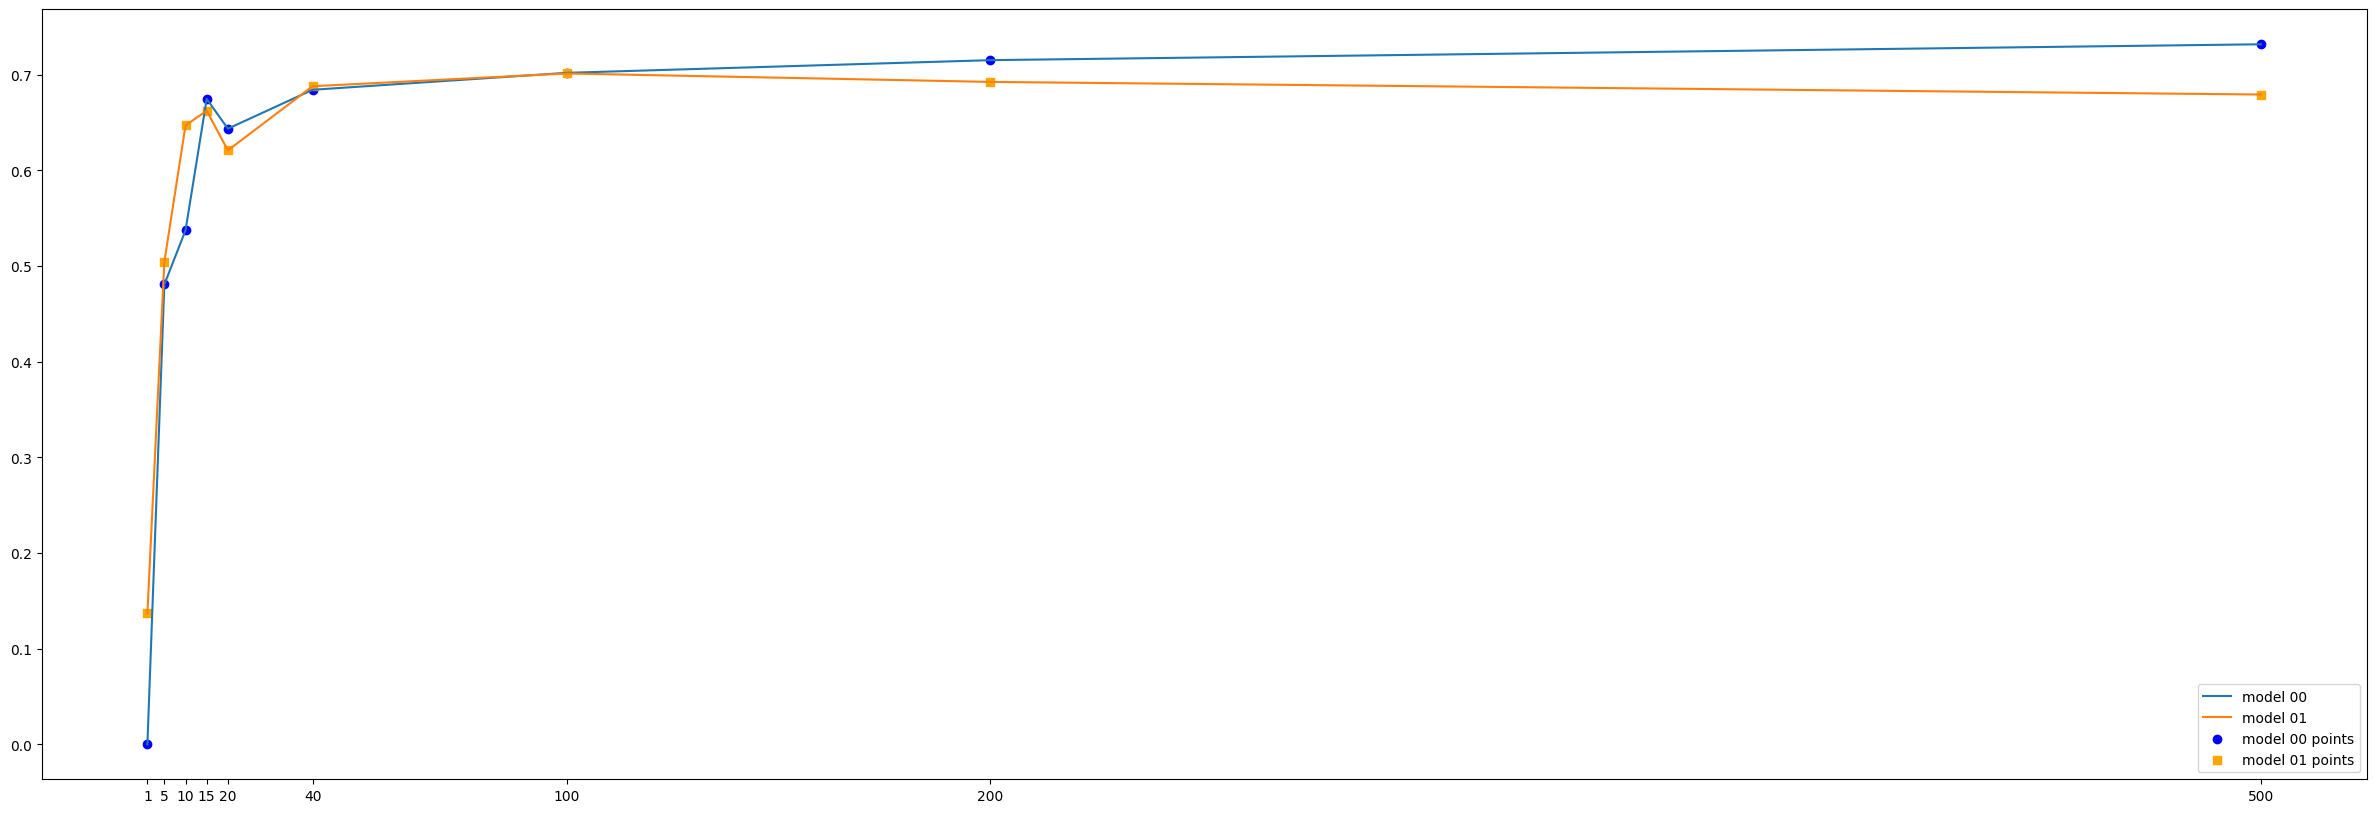

In [165]:
x_values = [1, 5, 10, 15, 20, 40, 100, 200, 500]
# Plot the lines
plt.plot(x_values, f1_00, label='model 00')
plt.plot(x_values, f1_01, label='model 01')

# Plot the points for model 00
plt.scatter(x_values, f1_00, marker='o', color='b', label='model 00 points')

# Plot the points for model 01
plt.scatter(x_values, f1_01, marker='s', color='orange', label='model 01 points')

# Set the x-axis ticks and labels
plt.xticks(x_values)

# Add a legend
plt.legend()

# plt.rcParams["figure.figsize"] = (30,10)
# Show the plot
plt.show()

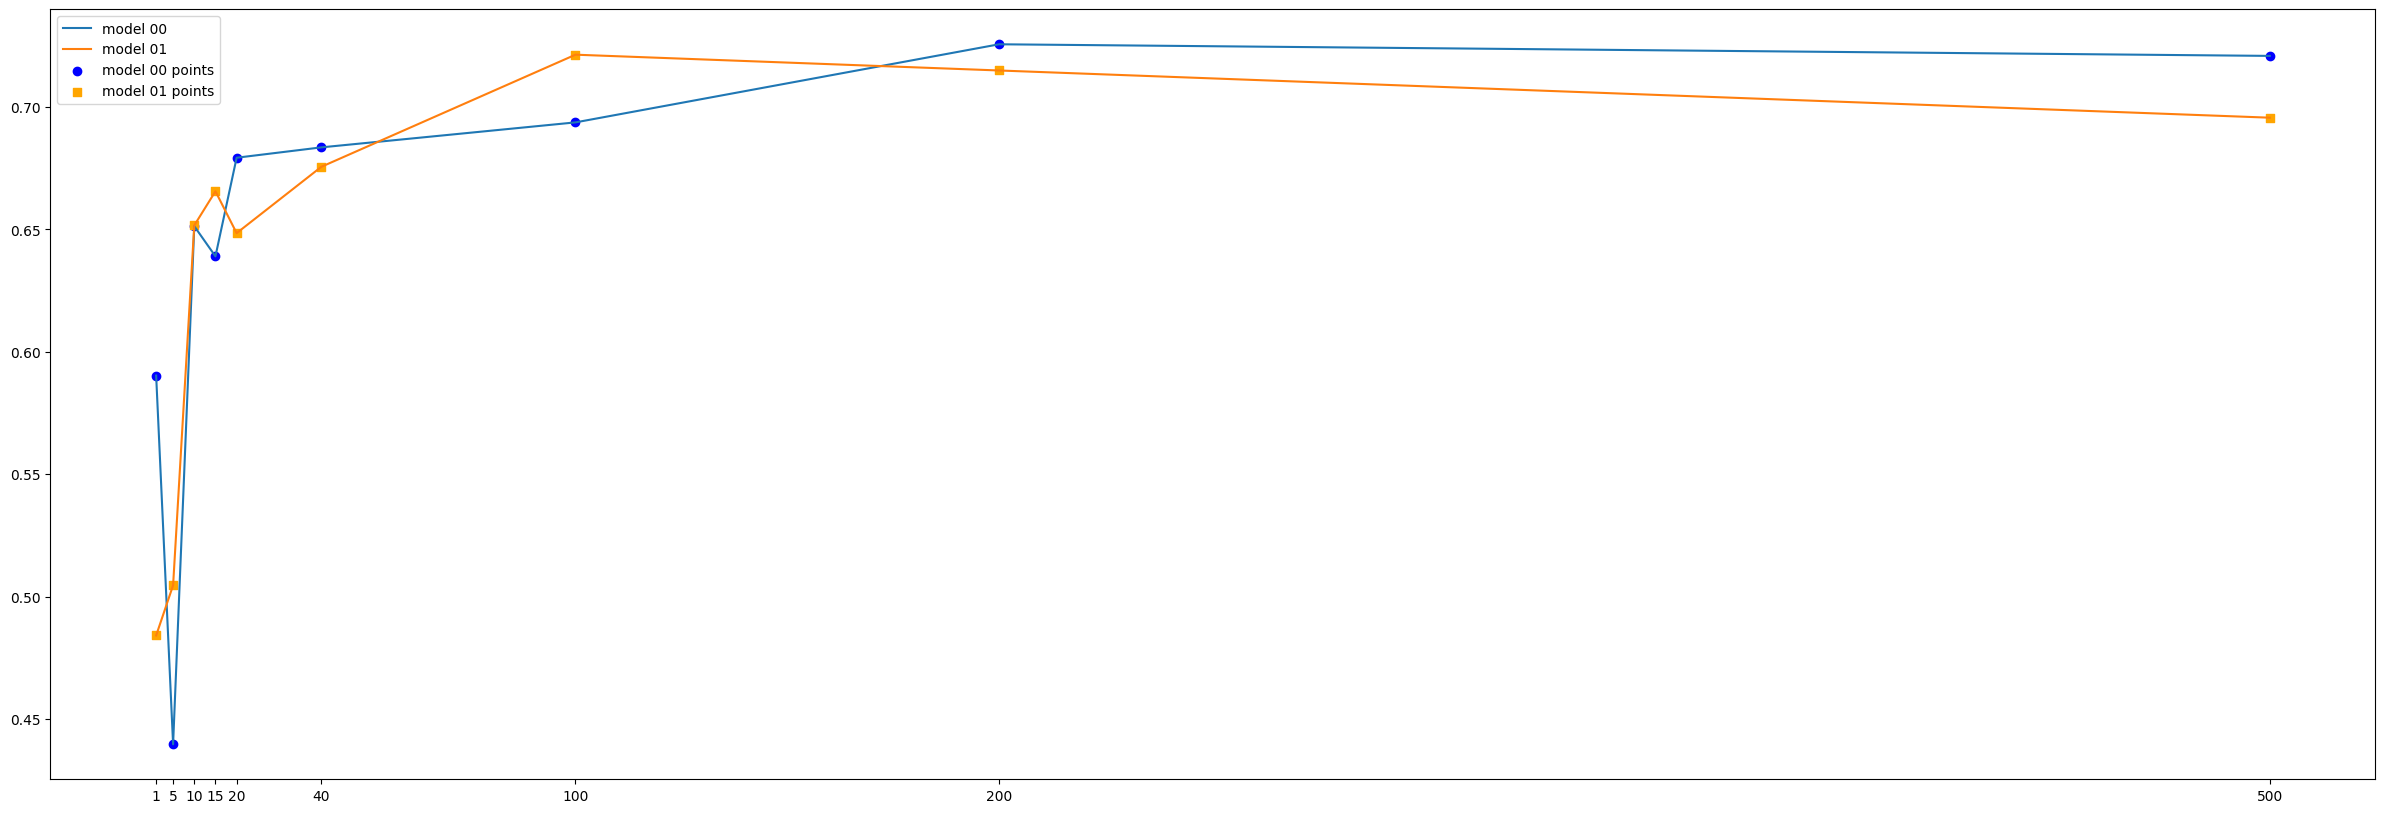

In [167]:
x_values = [1, 5, 10, 15, 20, 40, 100, 200, 500]
# Plot the lines
plt.plot(x_values, f1_00, label='model 00')
plt.plot(x_values, f1_01, label='model 01')

# Plot the points for model 00
plt.scatter(x_values, f1_00, marker='o', color='b', label='model 00 points')

# Plot the points for model 01
plt.scatter(x_values, f1_01, marker='s', color='orange', label='model 01 points')

# Set the x-axis ticks and labels
plt.xticks(x_values)

# Add a legend
plt.legend()

# plt.rcParams["figure.figsize"] = (30,10)
# Show the plot
plt.show()